# DS-GA 1003 Machine Learning

Student Name: Kuan-Lin Liu

## 1. Packages

In [33]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

%matplotlib inline

## 2. Read Data

In [3]:
data_path = "/Users/garyliu/Documents/NYUClasses/ML/Project/"

In [14]:
train = pd.read_csv(data_path+"train.csv")
val = pd.read_csv(data_path+"dev.csv")
train.head()

,ex_id,user_id,prod_id,rating,label,date,review
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...
2,2,925,0,4.0,1,2013-07-01,ordered lunch for 15 from Snack last Friday. ...
3,3,926,0,4.0,1,2011-07-28,This is a beautiful quaint little restaurant o...
4,4,927,0,4.0,1,2010-11-01,Snack is great place for a casual sit down lu...


In [15]:
val.head()

,ex_id,user_id,prod_id,rating,label,date,review
0,11,934,0,5.0,1,2014-01-20,"all around good place, cozy, I came in and did..."
1,17,940,0,4.0,0,2014-09-16,"For lunch, my friend and I had: -Lamb sandwich..."
2,20,943,0,5.0,0,2014-05-24,Some good Big Greek cooking!! Came to City on ...
3,30,953,0,4.0,0,2013-10-17,So... as you may notice from some of my other ...
4,43,966,0,3.0,0,2012-12-19,"I don't understand the whole ""You can't order ..."


Merge train and val datasets for exploration.

In [16]:
data = pd.concat([train, val])

In [17]:
print("Full data dimension: {}".format(data.shape))
print("Training data dimension: {}".format(train.shape))
print("Validation data dimension: {}".format(val.shape))
print("---")
print(data.dtypes)

Full data dimension: (286792, 7)
Training data dimension: (250874, 7)
Validation data dimension: (35918, 7)
---
ex_id        int64
user_id      int64
prod_id      int64
rating     float64
label        int64
date        object
review      object
dtype: object


The training data contains <font color='blue'>250,874</font> rows and the testing data contains <font color='blue'>35,918</font> rows. They both have <font color='blue'>7</font> columns.

## 3. Exploration

### 3.1. What is ex_id?

From the length of the unique data in ex_id, I guess it represents an index of the row.

Besides, I guess user_id and prod_id mean the index of users and products (items).

In [31]:
def unique_data_len(data, col_name):
    return data[col_name].unique().__len__()

print("Length of Unique Rows:")
for col in ["ex_id", "user_id", "prod_id", "rating", "label"]:
    print(col + ": {}".format(unique_data_len(data, col)))

Length of Unique Rows:
ex_id: 286792
user_id: 137692
prod_id: 923
rating: 5
label: 2


### 3.2. Rating

The "rating" column has 5 unique classes, 1 to 5.

Most people gave positive ratings, 4 and 5.

In [40]:
rating_count = pd.DataFrame(data["rating"].value_counts())
print(rating_count)

     rating
5.0  112518
4.0  108145
3.0   38026
2.0   16603
1.0   11500


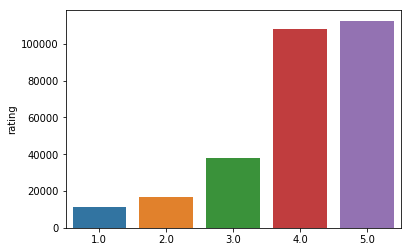

In [44]:
sns.barplot(x=rating_count.index, y=rating_count["rating"])

### 3.3. Review

The maximal length of reviews is 29012. The minimum is 1.

In [54]:
print(data["review"].apply(lambda row: len(row)).max())
print(data["review"].apply(lambda row: len(row)).min())

29012
1


The length of reviews has a left-skewed distribution.

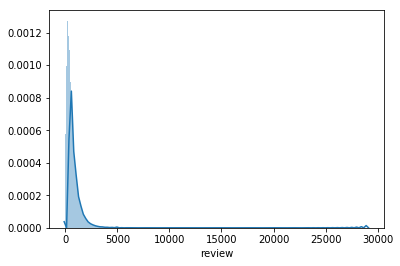

In [62]:
sns.distplot(
    data["review"].apply(lambda row: len(row)),
    bins = 500
)

### 3.4. Label

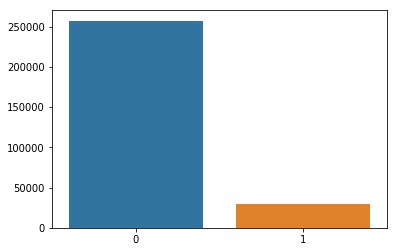

In [103]:
sns.barplot(x=data["label"].value_counts().index, y=data["label"].value_counts().values)

### 3.5. Label Vs. Rating

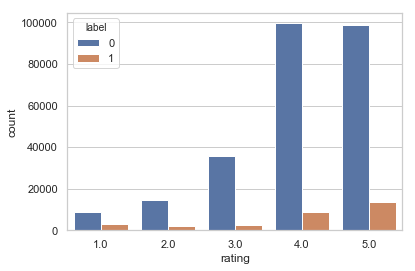

In [113]:
sns.countplot(x=data["rating"], hue=data["label"])

## 4. Text Preprocessing

In [ ]:
def clean_text(text, remove_stopwords = True):
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text,  
                  flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
return text

### 3.6. Reviews Length Vs. Label

In [114]:
data["review_len"] = data["review"].apply(lambda row: len(row))

Remove review_len > 5000

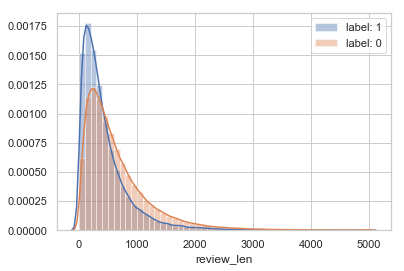

In [128]:
sns.distplot(data.loc[(data["review_len"]<5000) & (data["label"]==1),"review_len"], label="label: 1")
sns.distplot(data.loc[(data["review_len"]<5000) & (data["label"]==0),"review_len"], label="label: 0")
plt.legend()